In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Load the datasets
df_pessoas_final = pd.read_csv('../Data/df_pessoas_final.csv')

In [3]:
df_pessoas_final.head()

,id_familia,id_pessoa,cod_sexo_pessoa,idade,cod_parentesco_rf_pessoa,cod_raca_cor_pessoa,cod_local_nascimento_pessoa,cod_certidao_registrada_pessoa,cod_deficiencia_memb,cod_sabe_ler_escrever_memb,...,cod_ano_serie_frequentou_memb,cod_concluiu_frequentou_memb,cod_trabalhou_memb,cod_afastado_trab_memb,cod_agricultura_trab_memb,cod_principal_trab_memb,cod_trabalho_12_meses_memb,qtd_meses_12_meses_memb,peso.pes,classe_renda
0,268503,2351897,2,4,3,1.0,2.0,1,2,2.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,563277716385694,0.0
1,268503,2578989,2,15,3,1.0,1.0,1,2,1.0,...,-1.0,-1.0,2.0,2.0,-1.0,-1.0,2.0,-1.0,563277716385694,0.0
2,268503,3312847,2,13,3,1.0,1.0,1,2,2.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,563277716385694,0.0
3,268503,10482075,2,38,1,1.0,2.0,1,2,1.0,...,4.0,1.0,1.0,-1.0,1.0,6.0,1.0,12.0,563277716385694,0.0
4,2888440,5553031,2,5,3,4.0,2.0,1,2,2.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,563263195326236,0.0


In [4]:
df_pessoas_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254997 entries, 0 to 254996
Data columns (total 25 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id_familia                        254997 non-null  int64  
 1   id_pessoa                         254997 non-null  int64  
 2   cod_sexo_pessoa                   254997 non-null  int64  
 3   idade                             254997 non-null  int64  
 4   cod_parentesco_rf_pessoa          254997 non-null  int64  
 5   cod_raca_cor_pessoa               254997 non-null  float64
 6   cod_local_nascimento_pessoa       254997 non-null  float64
 7   cod_certidao_registrada_pessoa    254997 non-null  int64  
 8   cod_deficiencia_memb              254997 non-null  int64  
 9   cod_sabe_ler_escrever_memb        254997 non-null  float64
 10  ind_frequenta_escola_memb         254997 non-null  float64
 11  cod_escola_local_memb             254997 non-null  f

In [5]:
# Tentar converter todas as colunas de float64 para int64
for col in df_pessoas_final.select_dtypes(include=['float64']).columns:
    df_pessoas_final[col] = df_pessoas_final[col].apply(lambda x: int(x) if x != -1 else -1)

In [6]:
df_pessoas_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254997 entries, 0 to 254996
Data columns (total 25 columns):
 #   Column                            Non-Null Count   Dtype
---  ------                            --------------   -----
 0   id_familia                        254997 non-null  int64
 1   id_pessoa                         254997 non-null  int64
 2   cod_sexo_pessoa                   254997 non-null  int64
 3   idade                             254997 non-null  int64
 4   cod_parentesco_rf_pessoa          254997 non-null  int64
 5   cod_raca_cor_pessoa               254997 non-null  int64
 6   cod_local_nascimento_pessoa       254997 non-null  int64
 7   cod_certidao_registrada_pessoa    254997 non-null  int64
 8   cod_deficiencia_memb              254997 non-null  int64
 9   cod_sabe_ler_escrever_memb        254997 non-null  int64
 10  ind_frequenta_escola_memb         254997 non-null  int64
 11  cod_escola_local_memb             254997 non-null  int64
 12  cod_curso_freque

In [7]:
df_pessoas_final.head()

,id_familia,id_pessoa,cod_sexo_pessoa,idade,cod_parentesco_rf_pessoa,cod_raca_cor_pessoa,cod_local_nascimento_pessoa,cod_certidao_registrada_pessoa,cod_deficiencia_memb,cod_sabe_ler_escrever_memb,...,cod_ano_serie_frequentou_memb,cod_concluiu_frequentou_memb,cod_trabalhou_memb,cod_afastado_trab_memb,cod_agricultura_trab_memb,cod_principal_trab_memb,cod_trabalho_12_meses_memb,qtd_meses_12_meses_memb,peso.pes,classe_renda
0,268503,2351897,2,4,3,1,2,1,2,2,...,-1,-1,-1,-1,-1,-1,-1,-1,563277716385694,0
1,268503,2578989,2,15,3,1,1,1,2,1,...,-1,-1,2,2,-1,-1,2,-1,563277716385694,0
2,268503,3312847,2,13,3,1,1,1,2,2,...,-1,-1,-1,-1,-1,-1,-1,-1,563277716385694,0
3,268503,10482075,2,38,1,1,2,1,2,1,...,4,1,1,-1,1,6,1,12,563277716385694,0
4,2888440,5553031,2,5,3,4,2,1,2,2,...,-1,-1,-1,-1,-1,-1,-1,-1,563263195326236,0


In [8]:
df_pessoas_final.columns

Index(['id_familia', 'id_pessoa', 'cod_sexo_pessoa', 'idade',
       'cod_parentesco_rf_pessoa', 'cod_raca_cor_pessoa',
       'cod_local_nascimento_pessoa', 'cod_certidao_registrada_pessoa',
       'cod_deficiencia_memb', 'cod_sabe_ler_escrever_memb',
       'ind_frequenta_escola_memb', 'cod_escola_local_memb',
       'cod_curso_frequenta_memb', 'cod_ano_serie_frequenta_memb',
       'cod_curso_frequentou_pessoa_memb', 'cod_ano_serie_frequentou_memb',
       'cod_concluiu_frequentou_memb', 'cod_trabalhou_memb',
       'cod_afastado_trab_memb', 'cod_agricultura_trab_memb',
       'cod_principal_trab_memb', 'cod_trabalho_12_meses_memb',
       'qtd_meses_12_meses_memb', 'peso.pes', 'classe_renda'],
      dtype='object')

In [9]:
#Checando os valores únicos das colunas
# Definindo as colunas a serem analisadas
columns_to_check = ['cod_sexo_pessoa', 'idade',
       'cod_parentesco_rf_pessoa', 'cod_raca_cor_pessoa',
       'cod_local_nascimento_pessoa', 'cod_certidao_registrada_pessoa',
       'cod_deficiencia_memb', 'cod_sabe_ler_escrever_memb',
       'ind_frequenta_escola_memb', 'cod_escola_local_memb',
       'cod_curso_frequenta_memb', 'cod_ano_serie_frequenta_memb',
       'cod_curso_frequentou_pessoa_memb', 'cod_ano_serie_frequentou_memb',
       'cod_concluiu_frequentou_memb', 'cod_trabalhou_memb',
       'cod_afastado_trab_memb', 'cod_agricultura_trab_memb',
       'cod_principal_trab_memb', 'cod_trabalho_12_meses_memb',
       'qtd_meses_12_meses_memb', 'classe_renda'
]

# Criando um dicionário para armazenar os tipos de resposta
response_types = {}

# Iterando sobre as colunas e coletando os valores únicos
for column in columns_to_check:
    response_types[column] = df_pessoas_final[column].unique()

# Exibindo os tipos de resposta de cada coluna
for column, unique_values in response_types.items():
    print(f"Coluna: {column}\nValores únicos: {unique_values}\n")

Coluna: cod_sexo_pessoa
Valores únicos: [2 1]

Coluna: idade
Valores únicos: [  4  15  13  38   5  27  48  46   2  34  56  79  78  74  18   6  33  26
   3   7   9   1  22  11  19   8  17  36  12  31  21  65  72  23  32  14
  42  16  40  10  20  28  35  37  53   0  41  47  43  55  29  39  51  66
  24  75  67  62  64  45  25  44  54  63  52  71  77  95  80  69  58  49
  30  76  50  82  68  57  70  61  60  59  83  96  92  73 100  85  81  86
  90  91  84  88  98  87 107  89  99  97  93  94 116 130 121 104 101 111
 102 108]

Coluna: cod_parentesco_rf_pessoa
Valores únicos: [ 3  1  2  8  5 10  6  9  4 11  7]

Coluna: cod_raca_cor_pessoa
Valores únicos: [1 4 2 3 5]

Coluna: cod_local_nascimento_pessoa
Valores únicos: [2 1 3]

Coluna: cod_certidao_registrada_pessoa
Valores únicos: [1 2 3]

Coluna: cod_deficiencia_memb
Valores únicos: [2 1]

Coluna: cod_sabe_ler_escrever_memb
Valores únicos: [2 1]

Coluna: ind_frequenta_escola_memb
Valores únicos: [1 3 4 2]

Coluna: cod_escola_local_memb
Valore

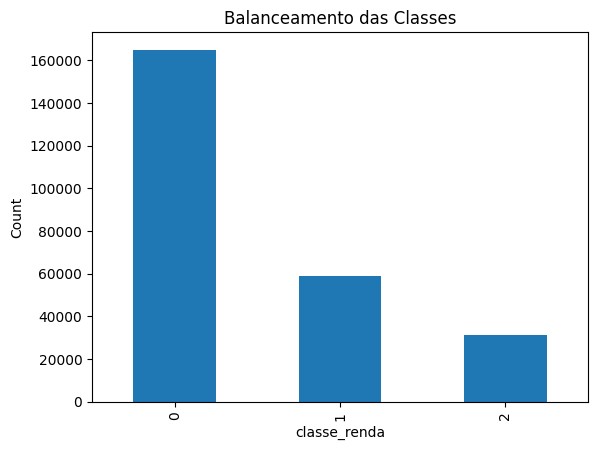

In [10]:
# Gráfico de barras para verificar balanceamento das classes considerando as pessoas
df_pessoas_final['classe_renda'].value_counts().plot(kind='bar')
plt.xlabel('classe_renda')
plt.ylabel('Count')
plt.title('Balanceamento das Classes')
plt.show()

In [11]:
# Verificar a contagem de valores únicos na coluna 'cod_parentesco_rf_pessoa'
print(df_pessoas_final['cod_parentesco_rf_pessoa'].value_counts())

cod_parentesco_rf_pessoa
3     113242
1      96502
2      31339
5       6080
6       2355
8       2149
10      2092
4        595
11       351
9        197
7         95
Name: count, dtype: int64


In [12]:
# Filtrar o dataframe por Responsável Familiar
df_pessoas_final_rf = df_pessoas_final[df_pessoas_final['cod_parentesco_rf_pessoa'] == 1]

# Visualizar as primeiras linhas do dataframe filtrado
df_pessoas_final_rf.head()


,id_familia,id_pessoa,cod_sexo_pessoa,idade,cod_parentesco_rf_pessoa,cod_raca_cor_pessoa,cod_local_nascimento_pessoa,cod_certidao_registrada_pessoa,cod_deficiencia_memb,cod_sabe_ler_escrever_memb,...,cod_ano_serie_frequentou_memb,cod_concluiu_frequentou_memb,cod_trabalhou_memb,cod_afastado_trab_memb,cod_agricultura_trab_memb,cod_principal_trab_memb,cod_trabalho_12_meses_memb,qtd_meses_12_meses_memb,peso.pes,classe_renda
3,268503,10482075,2,38,1,1,2,1,2,1,...,4,1,1,-1,1,6,1,12,563277716385694,0
5,2888440,8540843,2,27,1,4,1,1,2,1,...,1,2,2,2,-1,-1,2,-1,563263195326236,0
7,2113517,2667228,2,46,1,4,1,1,2,1,...,4,1,1,-1,2,6,1,12,563229587638739,2
9,4419096,4471735,2,34,1,1,1,1,2,1,...,3,1,2,2,-1,-1,2,-1,563276393161791,0
10,4241219,7097369,2,56,1,4,2,1,2,1,...,6,2,2,2,-1,-1,2,-1,56328235405831,0


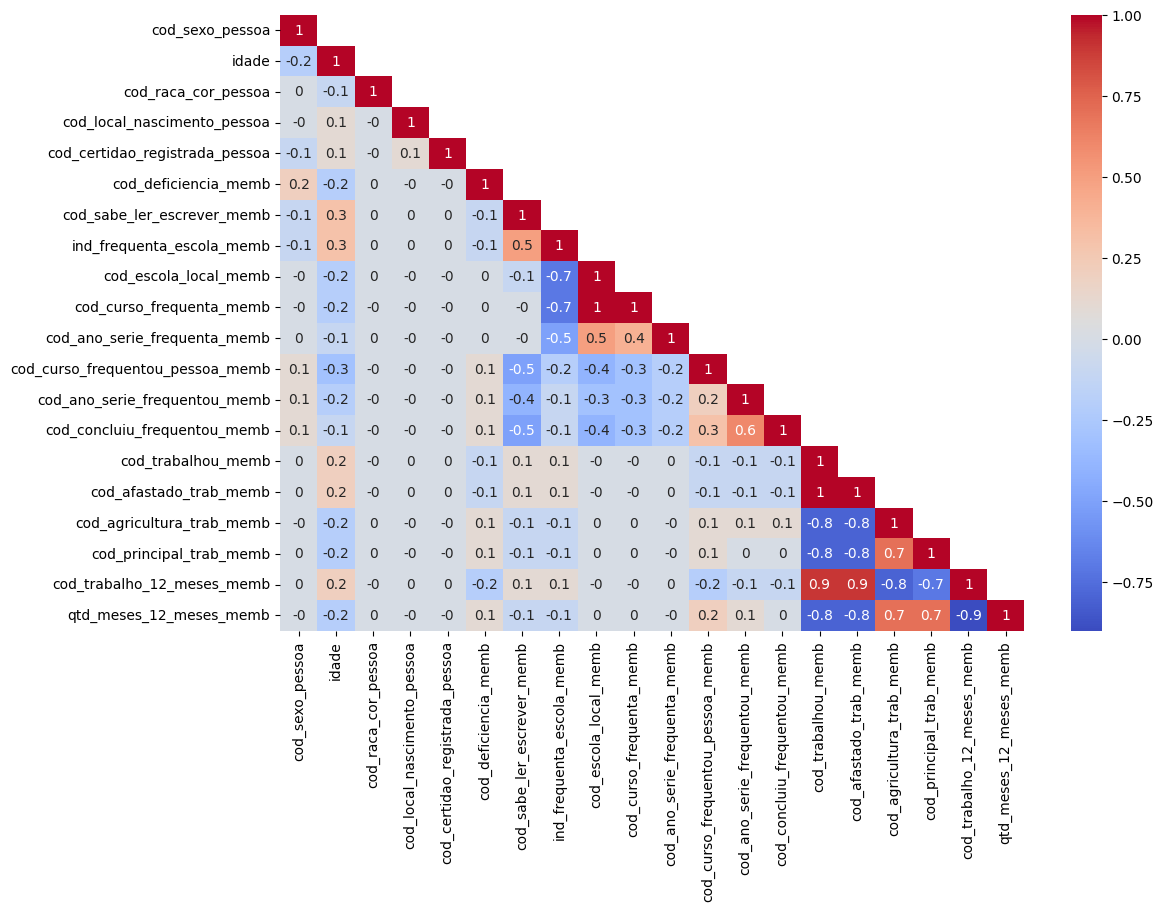

In [13]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_pessoas_final_rf[['cod_sexo_pessoa', 'idade',
      'cod_raca_cor_pessoa', 'cod_local_nascimento_pessoa', 'cod_certidao_registrada_pessoa',
       'cod_deficiencia_memb', 'cod_sabe_ler_escrever_memb',
       'ind_frequenta_escola_memb', 'cod_escola_local_memb',
       'cod_curso_frequenta_memb', 'cod_ano_serie_frequenta_memb',
       'cod_curso_frequentou_pessoa_memb', 'cod_ano_serie_frequentou_memb',
       'cod_concluiu_frequentou_memb', 'cod_trabalhou_memb',
       'cod_afastado_trab_memb', 'cod_agricultura_trab_memb',
       'cod_principal_trab_memb', 'cod_trabalho_12_meses_memb',
       'qtd_meses_12_meses_memb']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(12,8))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [14]:
#Retirando features com correlação > 8
df_pessoas_final_rf = df_pessoas_final_rf.drop(columns=['cod_afastado_trab_memb', 'qtd_meses_12_meses_memb'])
                                               
df_pessoas_final_rf.head()

,id_familia,id_pessoa,cod_sexo_pessoa,idade,cod_parentesco_rf_pessoa,cod_raca_cor_pessoa,cod_local_nascimento_pessoa,cod_certidao_registrada_pessoa,cod_deficiencia_memb,cod_sabe_ler_escrever_memb,...,cod_ano_serie_frequenta_memb,cod_curso_frequentou_pessoa_memb,cod_ano_serie_frequentou_memb,cod_concluiu_frequentou_memb,cod_trabalhou_memb,cod_agricultura_trab_memb,cod_principal_trab_memb,cod_trabalho_12_meses_memb,peso.pes,classe_renda
3,268503,10482075,2,38,1,1,2,1,2,1,...,-1,4,4,1,1,1,6,1,563277716385694,0
5,2888440,8540843,2,27,1,4,1,1,2,1,...,-1,8,1,2,2,-1,-1,2,563263195326236,0
7,2113517,2667228,2,46,1,4,1,1,2,1,...,-1,4,4,1,1,2,6,1,563229587638739,2
9,4419096,4471735,2,34,1,1,1,1,2,1,...,-1,8,3,1,2,-1,-1,2,563276393161791,0
10,4241219,7097369,2,56,1,4,2,1,2,1,...,-1,5,6,2,2,-1,-1,2,56328235405831,0


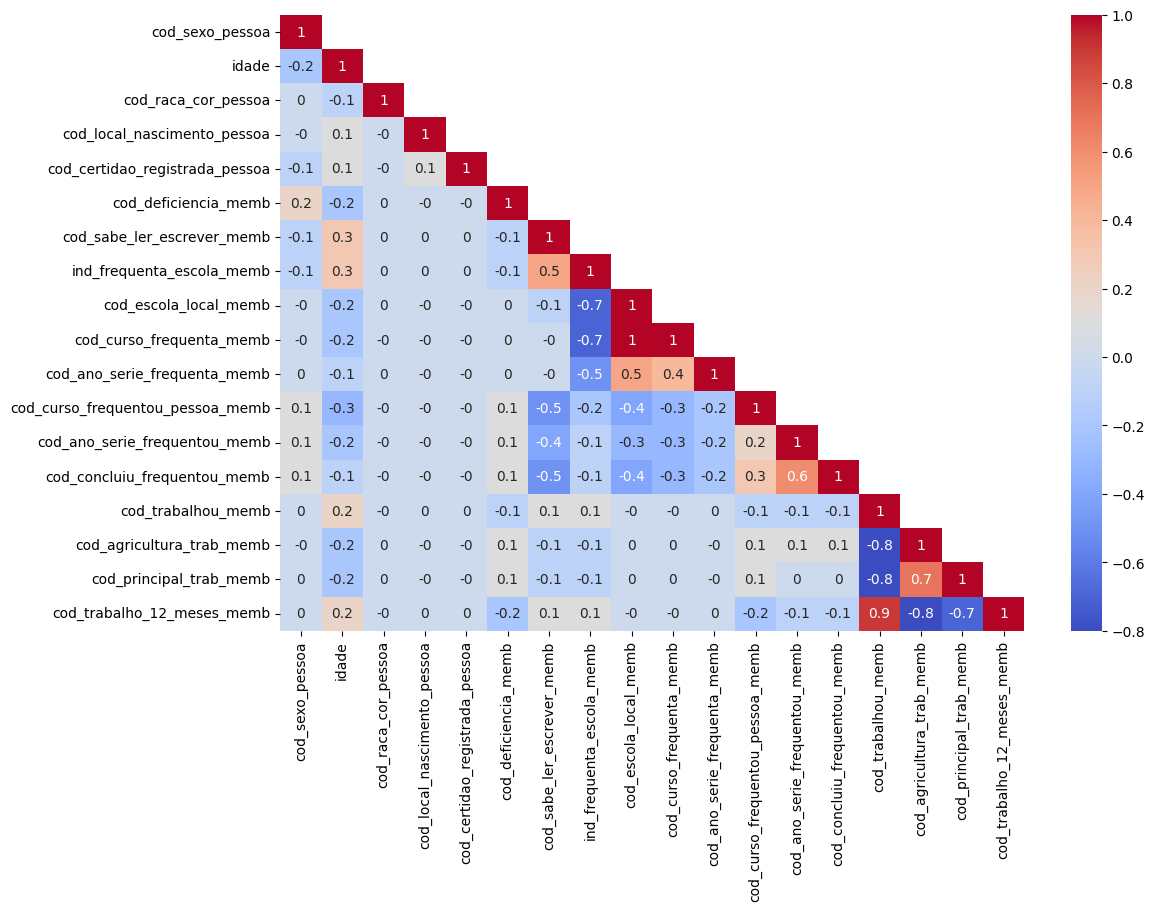

In [15]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_pessoas_final_rf[['cod_sexo_pessoa', 'idade',
      'cod_raca_cor_pessoa', 'cod_local_nascimento_pessoa', 'cod_certidao_registrada_pessoa',
       'cod_deficiencia_memb', 'cod_sabe_ler_escrever_memb',
       'ind_frequenta_escola_memb', 'cod_escola_local_memb',
       'cod_curso_frequenta_memb', 'cod_ano_serie_frequenta_memb',
       'cod_curso_frequentou_pessoa_memb', 'cod_ano_serie_frequentou_memb',
       'cod_concluiu_frequentou_memb', 'cod_trabalhou_memb',
       'cod_agricultura_trab_memb',
       'cod_principal_trab_memb', 'cod_trabalho_12_meses_memb']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(12,8))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [16]:
#Retirando features com correlação > 8
df_pessoas_final_rf = df_pessoas_final_rf.drop(columns=['cod_trabalho_12_meses_memb'])
                                               
df_pessoas_final_rf.head()

,id_familia,id_pessoa,cod_sexo_pessoa,idade,cod_parentesco_rf_pessoa,cod_raca_cor_pessoa,cod_local_nascimento_pessoa,cod_certidao_registrada_pessoa,cod_deficiencia_memb,cod_sabe_ler_escrever_memb,...,cod_curso_frequenta_memb,cod_ano_serie_frequenta_memb,cod_curso_frequentou_pessoa_memb,cod_ano_serie_frequentou_memb,cod_concluiu_frequentou_memb,cod_trabalhou_memb,cod_agricultura_trab_memb,cod_principal_trab_memb,peso.pes,classe_renda
3,268503,10482075,2,38,1,1,2,1,2,1,...,-1,-1,4,4,1,1,1,6,563277716385694,0
5,2888440,8540843,2,27,1,4,1,1,2,1,...,-1,-1,8,1,2,2,-1,-1,563263195326236,0
7,2113517,2667228,2,46,1,4,1,1,2,1,...,-1,-1,4,4,1,1,2,6,563229587638739,2
9,4419096,4471735,2,34,1,1,1,1,2,1,...,-1,-1,8,3,1,2,-1,-1,563276393161791,0
10,4241219,7097369,2,56,1,4,2,1,2,1,...,-1,-1,5,6,2,2,-1,-1,56328235405831,0


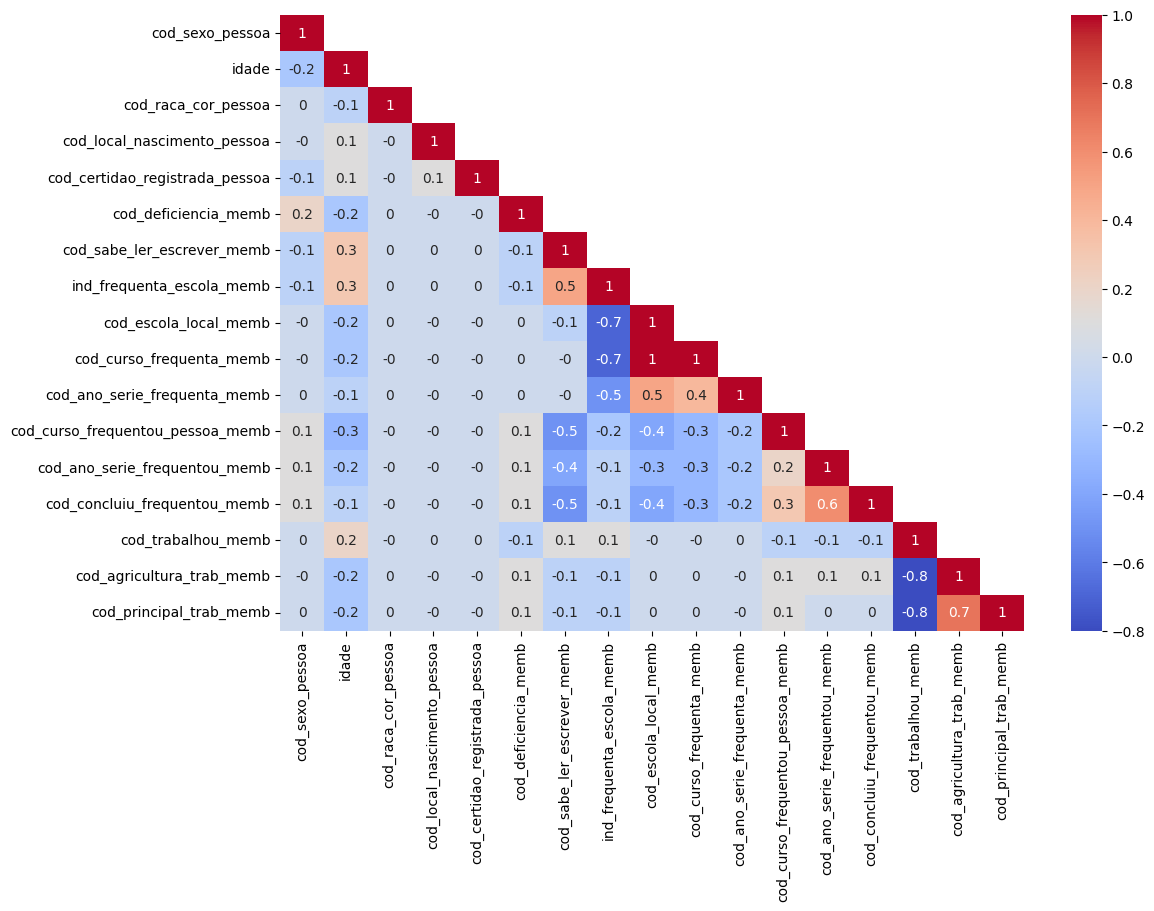

In [17]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_pessoas_final_rf[['cod_sexo_pessoa', 'idade',
      'cod_raca_cor_pessoa', 'cod_local_nascimento_pessoa', 'cod_certidao_registrada_pessoa',
       'cod_deficiencia_memb', 'cod_sabe_ler_escrever_memb',
       'ind_frequenta_escola_memb', 'cod_escola_local_memb',
       'cod_curso_frequenta_memb', 'cod_ano_serie_frequenta_memb',
       'cod_curso_frequentou_pessoa_memb', 'cod_ano_serie_frequentou_memb',
       'cod_concluiu_frequentou_memb', 'cod_trabalhou_memb',
       'cod_agricultura_trab_memb',
       'cod_principal_trab_memb']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(12,8))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

# Seleção das variáveis independentes (Features)

In [18]:
 df_pessoas_final_rf.columns

Index(['id_familia', 'id_pessoa', 'cod_sexo_pessoa', 'idade',
       'cod_parentesco_rf_pessoa', 'cod_raca_cor_pessoa',
       'cod_local_nascimento_pessoa', 'cod_certidao_registrada_pessoa',
       'cod_deficiencia_memb', 'cod_sabe_ler_escrever_memb',
       'ind_frequenta_escola_memb', 'cod_escola_local_memb',
       'cod_curso_frequenta_memb', 'cod_ano_serie_frequenta_memb',
       'cod_curso_frequentou_pessoa_memb', 'cod_ano_serie_frequentou_memb',
       'cod_concluiu_frequentou_memb', 'cod_trabalhou_memb',
       'cod_agricultura_trab_memb', 'cod_principal_trab_memb', 'peso.pes',
       'classe_renda'],
      dtype='object')

In [19]:
# Selecionando as variáveis que serão utilizadas para o modelo
X = df_pessoas_final_rf[['cod_sexo_pessoa', 'idade',
       'cod_raca_cor_pessoa',
       'cod_local_nascimento_pessoa', 'cod_certidao_registrada_pessoa',
       'cod_deficiencia_memb', 'cod_sabe_ler_escrever_memb',
       'ind_frequenta_escola_memb', 'cod_escola_local_memb',
       'cod_curso_frequenta_memb', 'cod_ano_serie_frequenta_memb',
       'cod_curso_frequentou_pessoa_memb', 'cod_ano_serie_frequentou_memb',
       'cod_concluiu_frequentou_memb', 'cod_trabalhou_memb',
       'cod_agricultura_trab_memb', 'cod_principal_trab_memb']]
y = df_pessoas_final_rf['classe_renda']

# Exibindo as informações de X
print('X =', X.shape)
X.head()

X = (96502, 17)


,cod_sexo_pessoa,idade,cod_raca_cor_pessoa,cod_local_nascimento_pessoa,cod_certidao_registrada_pessoa,cod_deficiencia_memb,cod_sabe_ler_escrever_memb,ind_frequenta_escola_memb,cod_escola_local_memb,cod_curso_frequenta_memb,cod_ano_serie_frequenta_memb,cod_curso_frequentou_pessoa_memb,cod_ano_serie_frequentou_memb,cod_concluiu_frequentou_memb,cod_trabalhou_memb,cod_agricultura_trab_memb,cod_principal_trab_memb
3,2,38,1,2,1,2,1,3,-1,-1,-1,4,4,1,1,1,6
5,2,27,4,1,1,2,1,3,-1,-1,-1,8,1,2,2,-1,-1
7,2,46,4,1,1,2,1,3,-1,-1,-1,4,4,1,1,2,6
9,2,34,1,1,1,2,1,3,-1,-1,-1,8,3,1,2,-1,-1
10,2,56,4,2,1,2,1,3,-1,-1,-1,5,6,2,2,-1,-1


In [20]:
y.head()

3     0
5     0
7     2
9     0
10    0
Name: classe_renda, dtype: int64

In [21]:
X.columns

Index(['cod_sexo_pessoa', 'idade', 'cod_raca_cor_pessoa',
       'cod_local_nascimento_pessoa', 'cod_certidao_registrada_pessoa',
       'cod_deficiencia_memb', 'cod_sabe_ler_escrever_memb',
       'ind_frequenta_escola_memb', 'cod_escola_local_memb',
       'cod_curso_frequenta_memb', 'cod_ano_serie_frequenta_memb',
       'cod_curso_frequentou_pessoa_memb', 'cod_ano_serie_frequentou_memb',
       'cod_concluiu_frequentou_memb', 'cod_trabalhou_memb',
       'cod_agricultura_trab_memb', 'cod_principal_trab_memb'],
      dtype='object')

In [22]:
#import pandas as pd
#from sklearn.compose import make_column_transformer
#from sklearn.preprocessing import OneHotEncoder

In [23]:
#col_transf = make_column_transformer((OneHotEncoder(), ['regiao_ibge', 'estrato', 'classf', 'cod_local_domic_fam', 'cod_especie_domic_fam', 'cod_agua_canalizada_fam',
 #   'cod_abaste_agua_domic_fam', 'cod_banheiro_domic_fam', 'cod_escoa_sanitario_domic_fam', 'cod_destino_lixo_domic_fam', 'cod_iluminacao_domic_fam', 'cod_calcamento_domic_fam',
#  'cod_familia_indigena_fam', 'ind_familia_quilombola_fam']),
  #                                   remainder='passthrough')

In [24]:
#col_transf.fit_transform(X)

In [25]:
#col_transf.get_feature_names_out()

In [26]:
# Realizar a transformação e criar um DataFrame temporário com as colunas transformadas
#transformed_data = col_transf.fit_transform(X)
#transformed_columns = col_transf.get_feature_names_out()
#df_transformed = pd.DataFrame(transformed_data, columns=transformed_columns, index=X.index)

# Substituir as colunas de X pelas colunas transformadas
#X = df_transformed

In [27]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Testando o modelo do tipo XGBClassifier

In [28]:
!pip install xgboost -q

In [29]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Mapeando as classes do target
y_train_mapped = y_train  

# Criar pipeline com normalização e modelo XGBoost
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(objective='multi:softmax', num_class=3, random_state=42))
])

# Definir hiperparâmetros para o Grid Search
param_grid = {
    'xgb__n_estimators': [250, 300, 350],
    'xgb__max_depth': [2, 3, 4],
    'xgb__learning_rate': [0.1]
}

# Grid Search com validação cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train_mapped)  # Usando y_train_mapped

# Melhor modelo encontrado
gb_best = grid_search.best_estimator_
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

# F1 score no conjunto de teste
y_test_mapped = y_test 
y_pred = gb_best.predict(X_test)
f1 = f1_score(y_test_mapped, y_pred, average='macro')  # Calcular F1 score para multiclasse
print(f"F1 Score: {f1:.2f}")

Melhores hiperparâmetros: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 4, 'xgb__n_estimators': 300}
F1 Score: 0.58


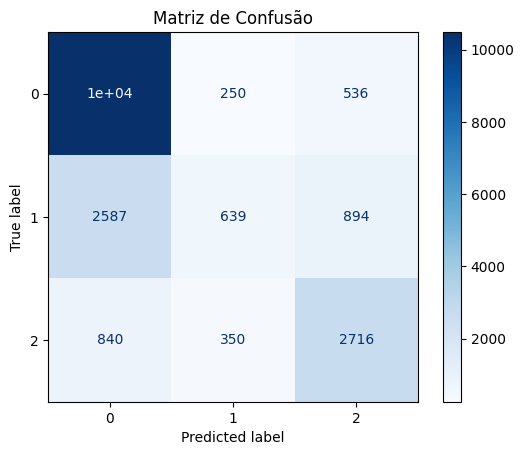

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Gerar e exibir a matriz de confusão diretamente a partir do estimador
ConfusionMatrixDisplay.from_estimator(grid_search.best_estimator_, X_test, y_test, cmap='Blues')
# Personalizar o gráfico
plt.title('Matriz de Confusão')
plt.show()

In [31]:
from sklearn.inspection import permutation_importance

In [32]:
# 7- Importância das features por permutação
# Obter o melhor modelo treinado do GridSearchCV
best_model = grid_search.best_estimator_

In [33]:
# Calcular a importância das features por permutação
perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)

In [34]:
# Obter as importâncias médias e o desvio padrão das importâncias
importances_mean = perm_importance.importances_mean
importances_std = perm_importance.importances_std
features = X_test.columns

In [35]:
# Obter as importâncias médias e o desvio padrão das importâncias
importance_vals = perm_importance.importances_mean
importance_std = perm_importance.importances_std
features = X_test.columns

In [36]:
# Ordenar as importâncias em ordem decrescente
indices = np.argsort(importance_vals)[::-1]

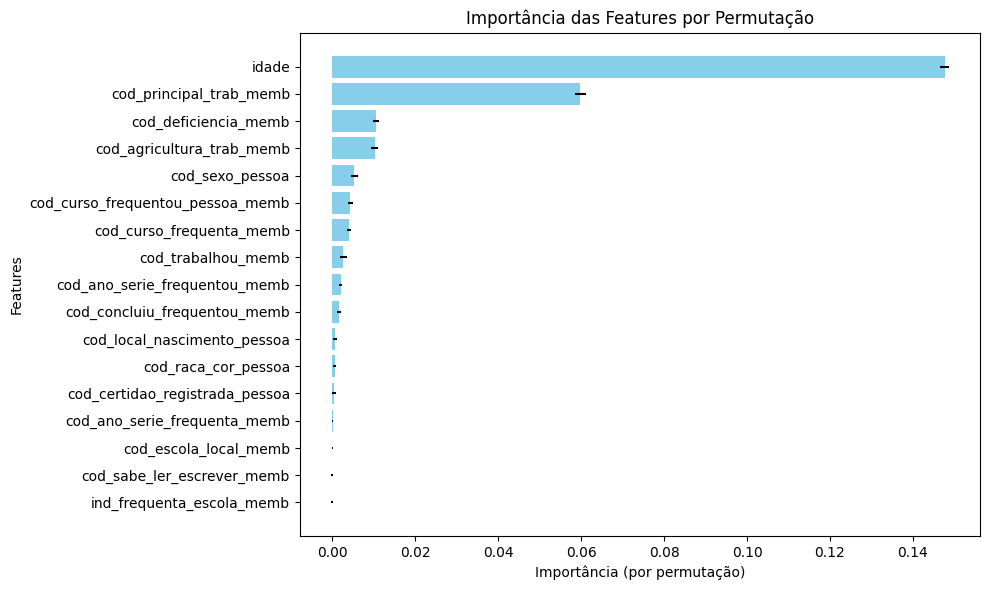

In [37]:
# Plotar a importância das features na horizontal com desvio padrão
plt.figure(figsize=(10, 6))
plt.title("Importância das Features por Permutação")
plt.barh(range(len(importance_vals)), importance_vals[indices], xerr=importance_std[indices], align="center", color='skyblue')
plt.yticks(range(len(importance_vals)), features[indices])
plt.gca().invert_yaxis()  # Inverter o eixo Y para que a feature mais importante fique no topo
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [38]:
# Criar uma lista de tuplas com a importância, desvio padrão e o nome da feature
feature_importance = list(zip(features, importance_vals, importance_std))

# Ordenar pela importância de forma decrescente
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Exibir a lista de importância das features
print("Importância das Features por Permutação:")
for feature, importance, std in feature_importance:
    print(f"Feature: {feature}, Importância: {importance:.4f}, Desvio Padrão: {std:.4f}")

Importância das Features por Permutação:
Feature: idade, Importância: 0.1476, Desvio Padrão: 0.0011
Feature: cod_principal_trab_memb, Importância: 0.0597, Desvio Padrão: 0.0013
Feature: cod_deficiencia_memb, Importância: 0.0105, Desvio Padrão: 0.0008
Feature: cod_agricultura_trab_memb, Importância: 0.0102, Desvio Padrão: 0.0008
Feature: cod_sexo_pessoa, Importância: 0.0053, Desvio Padrão: 0.0007
Feature: cod_curso_frequentou_pessoa_memb, Importância: 0.0044, Desvio Padrão: 0.0006
Feature: cod_curso_frequenta_memb, Importância: 0.0040, Desvio Padrão: 0.0004
Feature: cod_trabalhou_memb, Importância: 0.0027, Desvio Padrão: 0.0008
Feature: cod_ano_serie_frequentou_memb, Importância: 0.0020, Desvio Padrão: 0.0004
Feature: cod_concluiu_frequentou_memb, Importância: 0.0017, Desvio Padrão: 0.0005
Feature: cod_local_nascimento_pessoa, Importância: 0.0007, Desvio Padrão: 0.0004
Feature: cod_raca_cor_pessoa, Importância: 0.0006, Desvio Padrão: 0.0004
Feature: cod_certidao_registrada_pessoa, Impor

In [41]:
# 7. Criar um DataFrame com as importâncias
importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_importance.importances_mean
})

# 8. Filtrar as features com importância maior que 0.001
important_features = importance_df[importance_df['Importance'] > 0.001]['Feature']

print("Features com importância maior que 0.001:")
print(important_features)

# 9. Selecionar apenas as colunas importantes no conjunto de dados
X_train_filtered = X_train[important_features]
X_test_filtered = X_test[important_features]

# Grid Search com validação cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_filtered, y_train)

# Melhor modelo encontrado
gb_best = grid_search.best_estimator_
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

# F1 score
y_pred = gb_best.predict(X_test_filtered)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

Features com importância maior que 0.001:
0                      cod_sexo_pessoa
1                                idade
5                 cod_deficiencia_memb
9             cod_curso_frequenta_memb
11    cod_curso_frequentou_pessoa_memb
12       cod_ano_serie_frequentou_memb
13        cod_concluiu_frequentou_memb
14                  cod_trabalhou_memb
15           cod_agricultura_trab_memb
16             cod_principal_trab_memb
Name: Feature, dtype: object


C:\Users\Admin\miniconda3\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Melhores hiperparâmetros: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 2, 'xgb__n_estimators': 250}
F1 Score: 0.57


# Testando o modelo Árvore de decisão

In [42]:
# Importando as bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
# Filtrar as features com importância maior que 0.001
important_features = importance_df[importance_df['Importance'] > 0.001]['Feature'].tolist()


In [44]:
# Selecionar apenas as important_features do df_pessoas_final_rf
X = X[important_features]

In [45]:
# Dividir os dados em treino e teste (70% treino e 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [46]:
# Criar e treinar o modelo de Árvore de Decisão
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=3)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [47]:
# Fazer previsões nos dados de teste
y_pred = decision_tree.predict(X_test)

In [48]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 0.6934

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.73      0.92      0.82     16912
           1       0.46      0.14      0.21      6179
           2       0.63      0.62      0.62      5860

    accuracy                           0.69     28951
   macro avg       0.60      0.56      0.55     28951
weighted avg       0.65      0.69      0.65     28951



In [49]:
# Importância das features utilizadas pelo modelo
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': decision_tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [50]:
print("\nImportância das Features no Modelo de Árvore de Decisão:")
print(feature_importances)


Importância das Features no Modelo de Árvore de Decisão:
                            Feature  Importance
1                             idade    0.695935
9           cod_principal_trab_memb    0.221084
2              cod_deficiencia_memb    0.082982
0                   cod_sexo_pessoa    0.000000
3          cod_curso_frequenta_memb    0.000000
4  cod_curso_frequentou_pessoa_memb    0.000000
5     cod_ano_serie_frequentou_memb    0.000000
6      cod_concluiu_frequentou_memb    0.000000
7                cod_trabalhou_memb    0.000000
8         cod_agricultura_trab_memb    0.000000


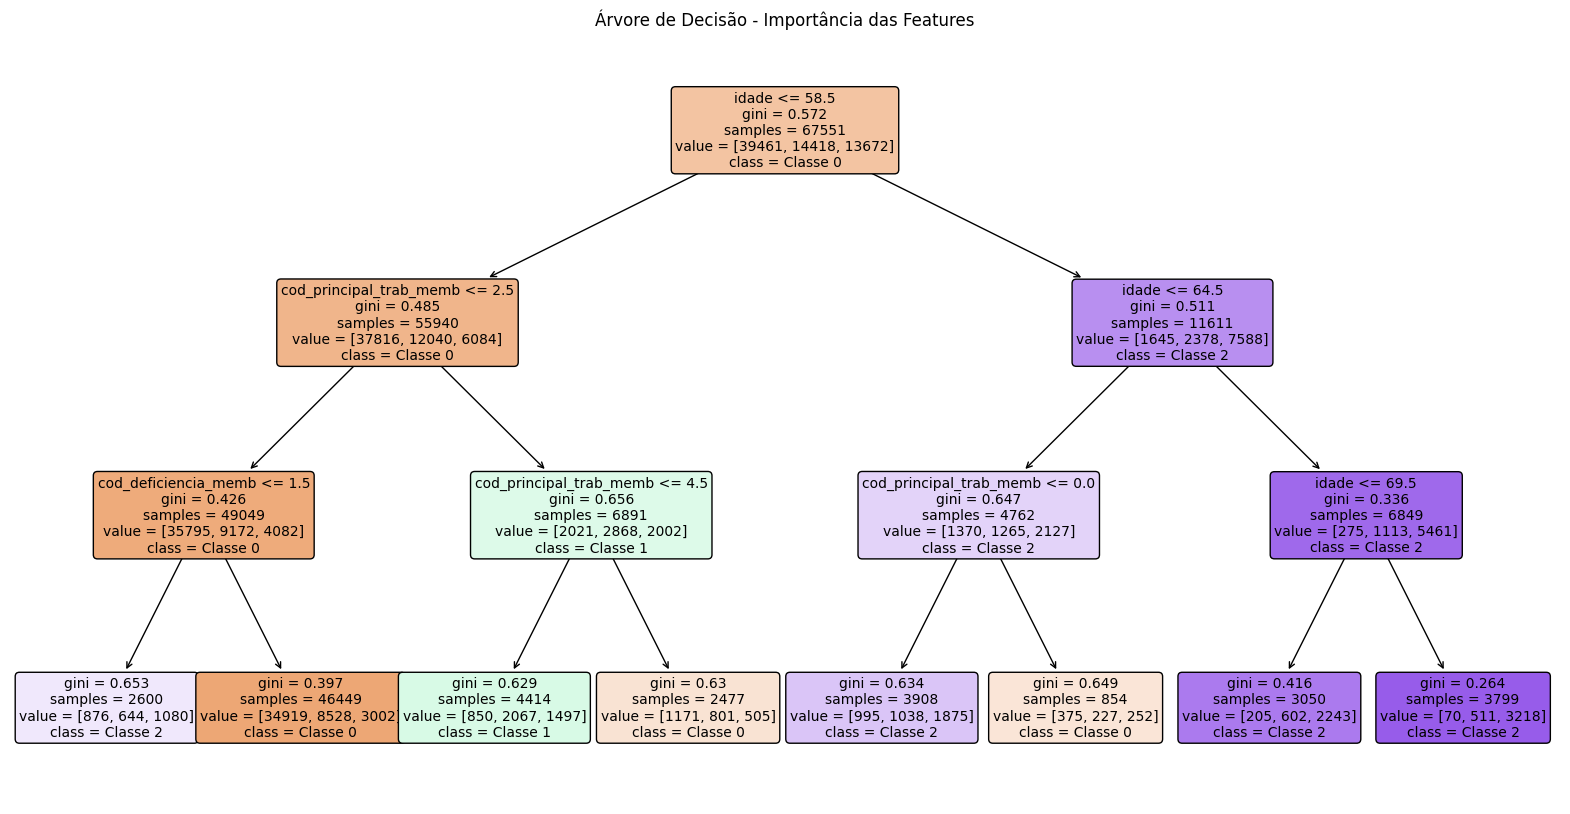

In [51]:
# Plotar a Árvore de Decisão
plt.figure(figsize=(20, 10))
plot_tree(
    decision_tree, 
    feature_names=X.columns, 
    class_names=['Classe 0', 'Classe 1', 'Classe 2'],  # Substitua pelos nomes das classes reais, se necessário
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.title("Árvore de Decisão - Importância das Features")
plt.show()

# Testando o modelo RandomForest

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Filtrar as features com importância maior que 0.001
important_features = importance_df[importance_df['Importance'] > 0.001]['Feature'].tolist()


In [54]:
# Selecionar apenas as important_features do df_pessoas_final_rf
X = X[important_features]

In [55]:
# Dividir os dados em treino e teste (70% treino e 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [56]:
# Criar e treinar o modelo Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, n_jobs=-1)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

In [57]:
# Fazer previsões nos dados de teste
y_pred = random_forest.predict(X_test)

In [58]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 0.7122

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83     16912
           1       0.49      0.15      0.23      6179
           2       0.66      0.67      0.67      5860

    accuracy                           0.71     28951
   macro avg       0.63      0.58      0.58     28951
weighted avg       0.67      0.71      0.67     28951



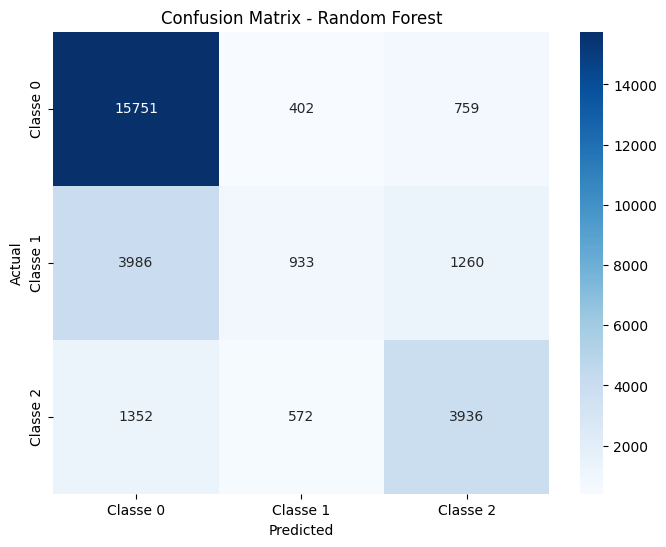

In [59]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1', 'Classe 2'], 
            yticklabels=['Classe 0', 'Classe 1', 'Classe 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [60]:
# Importância das features utilizadas pelo modelo
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': random_forest.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [61]:
print("\nImportância das Features no Modelo Random Forest:")
print(feature_importances)


Importância das Features no Modelo Random Forest:
                            Feature  Importance
1                             idade    0.548765
9           cod_principal_trab_memb    0.182945
2              cod_deficiencia_memb    0.061203
4  cod_curso_frequentou_pessoa_memb    0.050433
8         cod_agricultura_trab_memb    0.041428
0                   cod_sexo_pessoa    0.040823
5     cod_ano_serie_frequentou_memb    0.021316
3          cod_curso_frequenta_memb    0.020119
6      cod_concluiu_frequentou_memb    0.016801
7                cod_trabalhou_memb    0.016166


# Testando o modelo CatBoost

In [62]:
!pip install catboost -q

In [63]:
# Importar bibliotecas necessárias
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [64]:
# Filtrar as features com importância maior que 0.001
important_features = importance_df[importance_df['Importance'] > 0.001]['Feature'].tolist()

In [65]:
# Selecionar apenas as important_features do df_pessoas_final_rf
X = X[important_features]

In [66]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96502 entries, 3 to 254996
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   cod_sexo_pessoa                   96502 non-null  int64
 1   idade                             96502 non-null  int64
 2   cod_deficiencia_memb              96502 non-null  int64
 3   cod_curso_frequenta_memb          96502 non-null  int64
 4   cod_curso_frequentou_pessoa_memb  96502 non-null  int64
 5   cod_ano_serie_frequentou_memb     96502 non-null  int64
 6   cod_concluiu_frequentou_memb      96502 non-null  int64
 7   cod_trabalhou_memb                96502 non-null  int64
 8   cod_agricultura_trab_memb         96502 non-null  int64
 9   cod_principal_trab_memb           96502 non-null  int64
dtypes: int64(10)
memory usage: 8.1 MB


In [67]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [68]:
# Certifique-se de que important_features seja uma lista ou um objeto Index
cat_features_list = list(important_features)  # Converte important_features para uma lista de strings

In [69]:
# Criar o Pool do CatBoost para lidar com as colunas categóricas
train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features_list)
test_pool = Pool(data=X_test, label=y_test, cat_features=cat_features_list)

In [70]:
# Instanciar o modelo CatBoostClassifier
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    eval_metric='Accuracy',
    verbose=100,
    random_seed=42
)

In [71]:
# Treinar o modelo
model.fit(train_pool, eval_set=test_pool, early_stopping_rounds=50)

0:	learn: 0.7072836	test: 0.7091342	best: 0.7091342 (0)	total: 207ms	remaining: 3m 27s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7160250764
bestIteration = 48

Shrink model to first 49 iterations.


In [72]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7160250764209108
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.94      0.83     11275
           1       0.52      0.15      0.23      4120
           2       0.67      0.68      0.67      3906

    accuracy                           0.72     19301
   macro avg       0.64      0.59      0.58     19301
weighted avg       0.68      0.72      0.67     19301



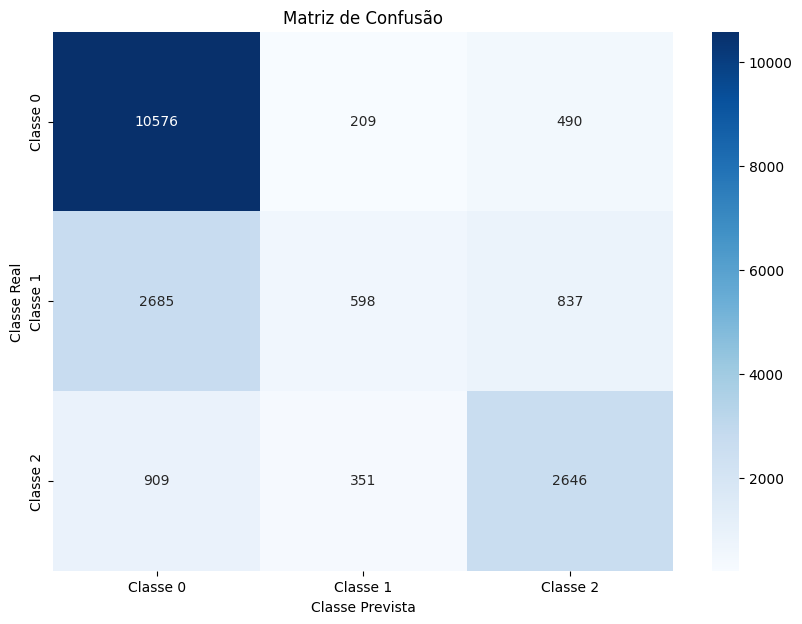

In [73]:
# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Classe 0', 'Classe 1', 'Classe 2'],  # Ajuste os rótulos conforme necessário
            yticklabels=['Classe 0', 'Classe 1', 'Classe 2'])  # Ajuste os rótulos conforme necessário
plt.title('Matriz de Confusão')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.show()

In [74]:
# Exibir a importância das features
feature_importances = model.get_feature_importance(prettified=True)
print("Feature Importances:\n", feature_importances)

Feature Importances:
                          Feature Id  Importances
0                             idade    39.244054
1           cod_principal_trab_memb    31.973456
2              cod_deficiencia_memb     7.553197
3                   cod_sexo_pessoa     7.069336
4  cod_curso_frequentou_pessoa_memb     4.682830
5          cod_curso_frequenta_memb     3.008332
6         cod_agricultura_trab_memb     2.798097
7     cod_ano_serie_frequentou_memb     2.101457
8      cod_concluiu_frequentou_memb     1.569241
9                cod_trabalhou_memb     0.000000


# Resumindo o resultado de todos os modelos

In [75]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [76]:
# Modelos treinados e os respectivos conjuntos de teste e predições

models = {'XGBoost with Grid Search': gb_best, 
          'RandomForestClassifier': random_forest, 
          'DecisionTreeClassifier': decision_tree,
           'CatBoostClassifier': model}
#y_test: Variável de target de teste
predictions = {'XGBoost with Grid Search': y_pred, 'RandomForestClassifier': y_pred, 'DecisionTreeClassifier': y_pred, 'CatBoostClassifier': y_pred}

In [77]:
# Dicionário para armazenar as métricas dos modelos
model_scores = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

In [78]:
# Avaliar cada modelo e armazenar as métricas
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    # Adicionar o nome do modelo e as respectivas métricas
    model_scores['Model'].append(model_name)
    model_scores['Accuracy'].append(accuracy_score(y_test, y_pred))
    model_scores['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    model_scores['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    model_scores['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))


# Criar um DataFrame para organizar os resultados
scores_df = pd.DataFrame(model_scores)

# Mostrar o resumo dos scores
print("Resumo dos Scores dos Modelos:")
print(scores_df)

Resumo dos Scores dos Modelos:
                      Model  Accuracy  Precision    Recall  F1 Score
0  XGBoost with Grid Search  0.715611   0.681893  0.715611  0.668926
1    RandomForestClassifier  0.714730   0.678533  0.714730  0.671052
2    DecisionTreeClassifier  0.694005   0.652137  0.694005  0.648431
3        CatBoostClassifier  0.716025   0.681014  0.716025  0.669904


In [79]:
# Avaliando as features mais importantes para cada modelo

# Dicionário para armazenar as importâncias das features
feature_importances_dict = {}

# Avaliar a importância das features para cada modelo
for model_name, model in models.items():
    print(f"\nAvaliação do modelo: {model_name}")

    if model_name == "CatBoostClassifier":
        # Avaliação de importância usando CatBoost
        feature_importances = model.get_feature_importance(prettified=True)
        
        # Criar um DataFrame com as importâncias
        importance_df = pd.DataFrame(feature_importances)

        # Renomear colunas para 'Feature' e 'Importance'
        importance_df.columns = ['Feature', 'Importance']
        importance_df['Std'] = None  # Adiciona uma coluna Std como None para manter a estrutura

        # Ordenar pela importância de forma decrescente
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

    else:
        # Avaliar a importância das features usando permutação para outros modelos
        result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

        # Criar um DataFrame com as importâncias
        importance_df = pd.DataFrame({
            'Feature': X_test.columns,
            'Importance': result.importances_mean,
            'Std': result.importances_std
        })

        # Ordenar pela importância de forma decrescente
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Exibir as 5 principais features
    top_features = importance_df.head(5)
    print("\nImportância das Features por Permutação:" if model_name != "CatBoostClassifier" else "\nImportância das Features do CatBoost:")
    for index, row in top_features.iterrows():
        print(f"Feature: {row['Feature']}, Importância: {row['Importance']:.4f}, Desvio Padrão: {row['Std']:.4f}" if row['Std'] is not None else f"Feature: {row['Feature']}, Importância: {row['Importance']:.4f}")

    # Armazenar as importâncias no dicionário
    feature_importances_dict[model_name] = top_features



Avaliação do modelo: XGBoost with Grid Search

Importância das Features por Permutação:
Feature: idade, Importância: 0.1542, Desvio Padrão: 0.0015
Feature: cod_principal_trab_memb, Importância: 0.0602, Desvio Padrão: 0.0017
Feature: cod_agricultura_trab_memb, Importância: 0.0099, Desvio Padrão: 0.0005
Feature: cod_deficiencia_memb, Importância: 0.0081, Desvio Padrão: 0.0006
Feature: cod_curso_frequenta_memb, Importância: 0.0052, Desvio Padrão: 0.0005

Avaliação do modelo: RandomForestClassifier

Importância das Features por Permutação:
Feature: idade, Importância: 0.1386, Desvio Padrão: 0.0013
Feature: cod_principal_trab_memb, Importância: 0.0563, Desvio Padrão: 0.0011
Feature: cod_deficiencia_memb, Importância: 0.0117, Desvio Padrão: 0.0007
Feature: cod_agricultura_trab_memb, Importância: 0.0093, Desvio Padrão: 0.0008
Feature: cod_sexo_pessoa, Importância: 0.0058, Desvio Padrão: 0.0007

Avaliação do modelo: DecisionTreeClassifier

Importância das Features por Permutação:
Feature: ida

# Avaliando o balanceamento das classes

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
# Verificar a distribuição da variável target
target_distribution = y.value_counts(normalize=True)

In [83]:
print("Distribuição da variável target 'classe_renda':")
print(target_distribution)

Distribuição da variável target 'classe_renda':
classe_renda
0    0.584164
1    0.213436
2    0.202400
Name: proportion, dtype: float64


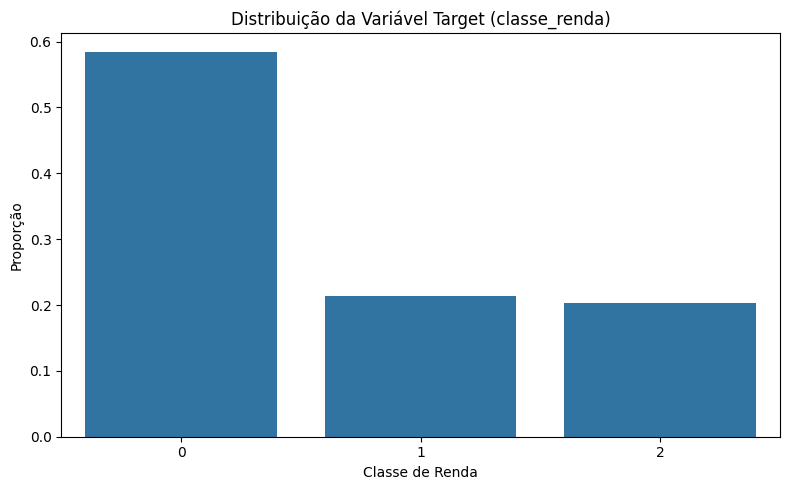

In [84]:
# Plotar a distribuição da variável target
plt.figure(figsize=(8, 5))
sns.barplot(x=target_distribution.index, y=target_distribution.values)
plt.title('Distribuição da Variável Target (classe_renda)')
plt.xlabel('Classe de Renda')
plt.ylabel('Proporção')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [85]:
# Exibir o número absoluto de ocorrências por classe
absolute_distribution = y.value_counts()

print("\nNúmero absoluto de ocorrências por classe:")
print(absolute_distribution)


Número absoluto de ocorrências por classe:
classe_renda
0    56373
1    20597
2    19532
Name: count, dtype: int64


In [86]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [87]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
# Separar as features (X) e a variável target (y)
# X = df_pessoas_final_rf.drop(columns=['classe_renda'])
# y = df_pessoas_final_rf['classe_renda']

In [89]:
# Primeiro, aplica-se o SMOTE para criar amostras sintéticas das classes minoritárias
# Depois, faz-se undersampling para reduzir a classe majoritária a um tamanho mais equilibrado
over = SMOTE(sampling_strategy={1.0: 35000, 2.0: 35000})  # Aumenta as classes 1 e 2 para 35k cada
under = RandomUnderSampler(sampling_strategy={0.0: 40000})  # Reduz a classe 0 para 40k

In [90]:
# Criar um pipeline que aplica SMOTE e depois o undersampling
pipeline = Pipeline(steps=[('o', over), ('u', under)])

In [91]:
# Aplicar o balanceamento ao conjunto de dados
X_balanced, y_balanced = pipeline.fit_resample(X, y)

In [92]:
# Verificar a nova distribuição das classes
balanced_distribution = pd.Series(y_balanced).value_counts()

print("Distribuição da variável target 'classe_renda' após o balanceamento:")
print(balanced_distribution)

Distribuição da variável target 'classe_renda' após o balanceamento:
classe_renda
0    40000
1    35000
2    35000
Name: count, dtype: int64


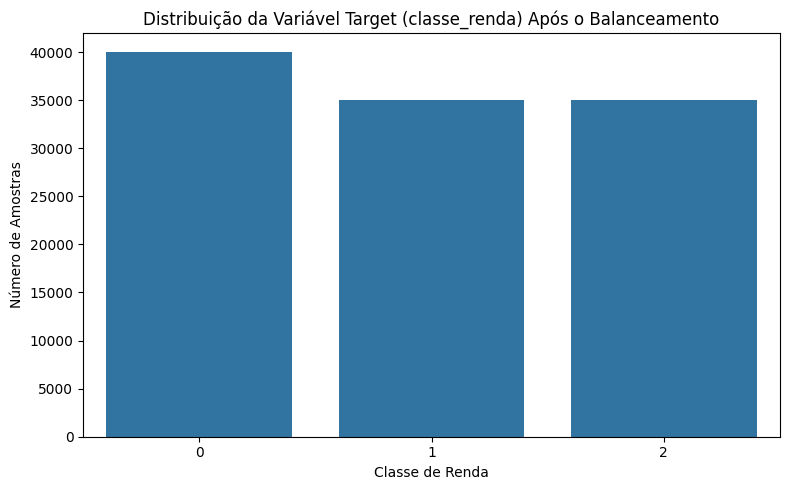

In [93]:
# Visualizar a distribuição das classes após o balanceamento
plt.figure(figsize=(8, 5))
sns.barplot(x=balanced_distribution.index, y=balanced_distribution.values)
plt.title('Distribuição da Variável Target (classe_renda) Após o Balanceamento')
plt.xlabel('Classe de Renda')
plt.ylabel('Número de Amostras')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Refazendo os modelos com as classes balanceadas

## Testando o modelo do tipo XGBClassifier - classes balancedas

In [ ]:
X_balanced.head()

In [ ]:
# Dividir os dados em treino e teste
X_balanced_train, X_balanced_test, y_balanced_train, y_balanced_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Mapeando as classes do target
y_train_mapped = y_train  

# Criar pipeline com normalização e modelo XGBoost
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(objective='multi:softmax', num_class=3, random_state=42))
])

# Definir hiperparâmetros para o Grid Search
param_grid = {
    'xgb__n_estimators': [250, 300, 350],
    'xgb__max_depth': [2, 3, 4],
    'xgb__learning_rate': [0.1]
}

# Grid Search com validação cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train_mapped)  # Usando y_train_mapped

# Melhor modelo encontrado
gb_best = grid_search.best_estimator_
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

# F1 score no conjunto de teste
y_test_mapped = y_test 
y_pred = gb_best.predict(X_test)
f1 = f1_score(y_test_mapped, y_pred, average='macro')  # Calcular F1 score para multiclasse
print(f"F1 Score: {f1:.2f}")